In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

### 1.  Άνοιγμα αρχείου και προεπεξεργασία δεδομένων

In [2]:
import csv
results = []
with open('abalone.csv') as myfile:
    data = csv.reader(myfile, delimiter=',')
    for dataline in data:
        results.append(dataline)
print(results)

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'], ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'], ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'], ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'], ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7'], ['I', '0.425', '0.3', '0.095', '0.3515', '0.141', '0.0775', '0.12', '8'], ['F', '0.53', '0.415', '0.15', '0.7775', '0.237', '0.1415', '0.33', '20'], ['F', '0.545', '0.425', '0.125', '0.768', '0.294', '0.1495', '0.26', '16'], ['M', '0.475', '0.37', '0.125', '0.5095', '0.2165', '0.1125', '0.165', '9'], ['F', '0.55', '0.44', '0.15', '0.8945', '0.3145', '0.151', '0.32', '19'], ['F', '0.525', '0.38', '0.14', '0.6065', '0.194', '0.1475', '0.21', '14'], ['M', '0.43', '0.35', '0.11', '0.406', '0.1675', '0.081', '0.135', '10'], ['M', '0.49', '0.38', '0.135', '0.5415', '0.2175', '0.095', '0.19', '11'], ['F', '0.535', '0.405',

#### Μετατροπή λίστας σε πίνακα numpy

In [3]:
resultsArray = np.array(results)

In [4]:
print(resultsArray)

[['M' '0.455' '0.365' ... '0.101' '0.15' '15']
 ['M' '0.35' '0.265' ... '0.0485' '0.07' '7']
 ['F' '0.53' '0.42' ... '0.1415' '0.21' '9']
 ...
 ['M' '0.6' '0.475' ... '0.2875' '0.308' '9']
 ['F' '0.625' '0.485' ... '0.261' '0.296' '10']
 ['M' '0.71' '0.555' ... '0.3765' '0.495' '12']]


In [5]:
np.shape(resultsArray)

(4177, 9)

#### Χρήση slicing για αφαίρεση του feature 'φύλο'

In [6]:
X_string = resultsArray[:,1:8]
y_string = resultsArray[:,8]

#### Μετατροπή τιμών απο strings σε floats

In [7]:
X = X_string.astype(float)
y = y_string.astype(float)

#### Χαρακτηριστικά του dataset

In [8]:
n_rows, n_cols = X.shape
print('Πλήθος γραμμών του πίνακα Χ:',n_rows)
print('Πλήθος μεταβλητών του πίνακα Χ:',n_cols)
print('Πλήθος στοιχείων του πίνακα Χ:',X.size)
print('Μέγιστη τιμή του y:',np.max(y))
print('Μικρότερη τιμή του y:',np.min(y))

Πλήθος γραμμών του πίνακα Χ: 4177
Πλήθος μεταβλητών του πίνακα Χ: 7
Πλήθος στοιχείων του πίνακα Χ: 29239
Μέγιστη τιμή του y: 29.0
Μικρότερη τιμή του y: 1.0


In [9]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

#### Μέσος και τυπική απόκλιση κάθε μεταβλητής

In [10]:
display(Markdown(
    "**Training data mean**: " + str(np.mean(X,0)) + "<br>" +
    "**Training data std**: " + str(np.std(X,0))  + "<br>"
))

**Training data mean**: [0.5239921  0.40788125 0.1395164  0.82874216 0.35936749 0.18059361
 0.23883086]<br>**Training data std**: [0.12007854 0.09922799 0.04182205 0.49033031 0.22193638 0.10960113
 0.13918601]<br>

#### Κανονικοποίηση;
Όχι. Και οι 7 μεταβλητές βρίσκονται στην ίδια τάξη μεγέθους όπως φαίνεται στο Training data mean

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

### 2. Κριτήριο αξιολόγησης

#### Συνάρτηση που υπολογίζει το ποσοστό επιτυχημένων προβλέψεων

In [12]:
def success_rate(y_test_pred,y_test,N):
    successes = 0
    for i in range(np.count_nonzero(y_test)): # np.count_nonzero(y_test)==y_test.size for this set
        if (np.abs(y_test_pred[i]-y_test[i]))<N:
            successes += 1
    return (successes/y_test.size)

### 3. Γραμμικά μοντέλα

### Μοντέλο πολλαπλής παλινδρόμησης χωρίς κανονικοποίηση

In [13]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

# Linear regression model
regr  = linear_model.LinearRegression()
y_train_pred = cross_val_predict(regr, X_train, y_train, cv=10)

# Train the model on all data
regr.fit(X_train, y_train)
y_test_pred = regr.predict(X_test)

# Choose constraint relaxation variable (small number between 1-1.5)
N = 1.0

display(Markdown(
    "**Train set explained variance**: {:.2f}".format(explained_variance_score(y_train, y_train_pred))+ "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_pred))+ "<br>" +
    "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test_pred, y_test, N))
))

**Train set explained variance**: 0.53<br>**Test set explained variance**: 0.48<br>**Test set success rate of predictions**: 0.405502

#### Συντελεστές w και y-interecept της συνάρτησης παλινδρόμησης 
Ο πρώτος συντελεστής (Length) φαίνεται να μη χρειάζεται για τον προσδιορισμό του αριθμού δακτυλίων των σαλιγκαριων

In [14]:
print(f'Weights: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Weights: [ -0.34918971  11.62776418  10.06459057   8.66278128 -19.38913569
  -9.76738256  10.26862505]
Intercept: 3.072464701914085


In [15]:
X_test.shape

(836, 7)

#### Plot outputs

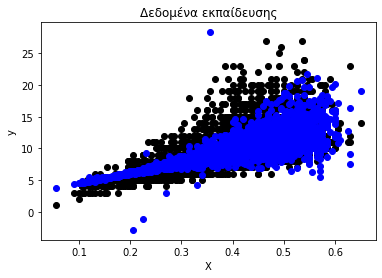

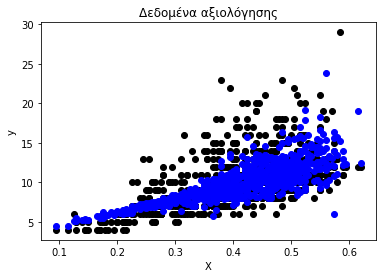

In [16]:
plt.figure()
plt.scatter(X_train[:,1], y_train,  color='black')
plt.scatter(X_train[:,1], y_train_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα εκπαίδευσης")

plt.figure()
plt.scatter(X_test[:,1], y_test,  color='black')
plt.scatter(X_test[:,1], y_test_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα αξιολόγησης")

plt.show()

### Μοντέλα  πολλαπλής παλινδρόμησης με κανονικοποίηση (Ridge, Lasso) και εύρεση λ μέσω Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

params = { 
           'alpha': np.logspace(-6, 4, 20) # try 20 values in logarithmic scale from 10^-6 to 10^4
         }

regr_grid1  = linear_model.Lasso(tol=0.1)
grid1 = GridSearchCV(estimator=regr_grid1, cv = 10, param_grid=params) 
grid1.fit(X_train, y_train) 
y_train_grid1_pred = grid1.predict(X_train)
y_test_grid1_pred = grid1.predict(X_test)

display(Markdown(
    "#### Αποτελέσματα για Lasso με grid search:\n" +
    "**Lasso Regression**: <br>" +
    "**Best lambda**: {:.3f}".format(grid1.best_params_['alpha'])  + "<br>" +
    "**Cross-val explained variance**: {:.2f}".format(explained_variance_score(y_train, y_train_grid1_pred)) + "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_grid1_pred)) + "<br>" +
    "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test_grid1_pred, y_test, N))
))

#### Αποτελέσματα για Lasso με grid search:
**Lasso Regression**: <br>**Best lambda**: 0.001<br>**Cross-val explained variance**: 0.54<br>**Test set explained variance**: 0.48<br>**Test set success rate of predictions**: 0.407895

In [18]:
regr_grid2  = linear_model.Ridge() 
grid2 = GridSearchCV(estimator=regr_grid2, cv = 10, param_grid=params) 
grid2.fit(X_train, y_train) 
y_train_grid2_pred = grid2.predict(X_train)
y_test_grid2_pred = grid2.predict(X_test)

display(Markdown(
    "#### Αποτελέσματα για Ridge με grid search:\n" +
    "**Ridge Regression**: <br>" +
    "**Best lambda**: {:.3f}".format(grid2.best_params_['alpha'])  + "<br>" +
    "**Cross-val explained variance**: {:.2f}".format(explained_variance_score(y_train, y_train_grid2_pred)) + "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_grid2_pred)) + "<br>" +
    "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test_grid2_pred, y_test, N))
))

#### Αποτελέσματα για Ridge με grid search:
**Ridge Regression**: <br>**Best lambda**: 0.616<br>**Cross-val explained variance**: 0.54<br>**Test set explained variance**: 0.48<br>**Test set success rate of predictions**: 0.400718

#### Με grid search και lasso regularization υπάρχει βελτίωση μόνο 0.407895-0.405502 = 0.00239

### 4. Μη-γραμμικά μοντέλα

### Πολυωνυμική παλινδρόμηση με όλες τις μεταβλητές

#### Δημιουργία πολυωνυμικών μεταβλητών

In [19]:
from sklearn.preprocessing import PolynomialFeatures

#Create a 2nd degree polynomial model upon which to fit the data
polyModel = PolynomialFeatures(degree = 2)
X_train_poly = polyModel.fit_transform(X_train)
X_test_poly = polyModel.fit_transform(X_test)
print("Training data shape:", np.shape(X_train_poly))
print("Test data shape:", np.shape(X_test_poly))


Training data shape: (3341, 36)
Test data shape: (836, 36)


#### Εκπαίδευση πολυωνυμικού μοντέλου και οι προβλέψεις του


In [20]:
# Ridge regression model (arbitrary alpha selection)
regr_poly  = linear_model.Ridge(alpha=0.001)
y_train_pred = cross_val_predict(regr_poly, X_train_poly, y_train, cv=10)

# Train the model on all data
regr_poly.fit(X_train_poly, y_train)
y_test_pred = regr_poly.predict(X_test_poly)

N=1

display(Markdown(
    "#### Αποτελέσματα πολυων/κής παλινδρόμησης :\n" +
    "**Cross-val coefficient of determination**: {:.2f}".format(explained_variance_score(y_train, y_train_pred)) + "<br>" +
    "**Coefficients from all data**: " + str(regr_poly.coef_)   + "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_pred)) + "<br>" +
     "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test_pred, y_test, N))
))

#### Αποτελέσματα πολυων/κής παλινδρόμησης :
**Cross-val coefficient of determination**: 0.41<br>**Coefficients from all data**: [  0.          12.933486    13.06354369  12.70186706   4.7556992
 -35.68516797  17.64638624  41.41755117 -37.13706669  34.06828505
  19.16727191  19.87458788   7.68572278 -66.76264339 -22.77925261
 -39.65452759  25.60034839  21.48305762  -4.78149636   6.67998397
 -64.23319389 -14.96680874 -10.9926603    1.97109529 -79.90949556
  34.52592695  -1.72262749 -42.21353783  16.13584935  22.34567572
  56.8428928    6.8215512    6.42171576  25.64714053 -37.87509387
 -18.69472388]<br>**Test set explained variance**: 0.54<br>**Test set success rate of predictions**: 0.442584

#### <span style="color:darkorchid">Η πολυωνυμική παλινδρόμηση επιφέρει μια βελτίωση αλλά δεν πιστεύω ότι είναι αρκετή αν για να ξεπληρώσει το παραπάνω υπολογιστικό κόστος που χρειάζεται από την πολλαπλή γραμμική παλινδρόμηση</span>

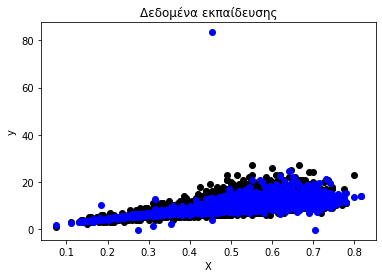

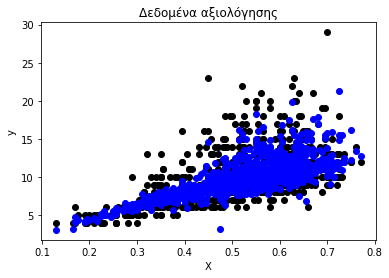

In [21]:
plt.figure()
plt.scatter(X_train_poly[:,1], y_train,  color='black')
plt.scatter(X_train_poly[:,1], y_train_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα εκπαίδευσης")

plt.figure()
plt.scatter(X_test_poly[:,1], y_test,  color='black')
plt.scatter(X_test_poly[:,1], y_test_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα αξιολόγησης")

plt.show()

In [22]:
regr_poly2  = linear_model.Ridge(alpha=10**5)
y_train_pred = cross_val_predict(regr_poly2, X_train_poly, y_train, cv=5)

regr_poly2.fit(X_train_poly, y_train)
y_test_pred = regr_poly2.predict(X_test_poly)

display(Markdown(
    "#### Αποτελέσματα πολυων/κής παλινδρόμησης με όλες τις μεταβλητές και αυθαίρετο λ=10^5" + ":\n" +
    "**Cross-val mean squared error**: {:.2f}".format(mean_squared_error(y_train, y_train_pred))  + "<br>" +
    "**Cross-val explained variance**: {:.2f}".format(explained_variance_score(y_train, y_train_pred)) + "<br>" +
    "**Test set mean squared error**: {:.2f}".format(mean_squared_error(y_test, y_test_pred))  + "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_pred)) + "<br>" +
     "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test_pred, y_test, N))
#    "**Coefficients from all data**: <br>" + str(regr_poly2.coef_)
))

#### Αποτελέσματα πολυων/κής παλινδρόμησης με όλες τις μεταβλητές και αυθαίρετο λ=10^5:
**Cross-val mean squared error**: 10.13<br>**Cross-val explained variance**: 0.02<br>**Test set mean squared error**: 10.25<br>**Test set explained variance**: 0.03<br>**Test set success rate of predictions**: 0.345694

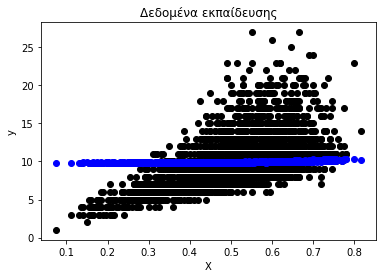

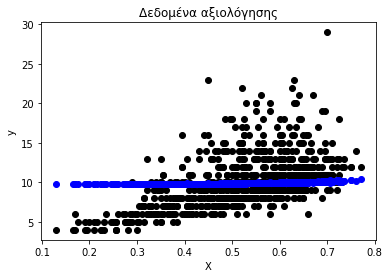

In [23]:
plt.figure()
plt.scatter(X_train_poly[:,1], y_train,  color='black')
plt.scatter(X_train_poly[:,1], y_train_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα εκπαίδευσης")

plt.figure()
plt.scatter(X_test_poly[:,1], y_test,  color='black')
plt.scatter(X_test_poly[:,1], y_test_pred, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Δεδομένα αξιολόγησης")

plt.show()

### k Nearest Neighbours Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor
regr_κΝΝ = KNeighborsRegressor(n_neighbors=6)
params = { 
           'n_neighbors': range(1,10),
            'weights': ['uniform', 'distance']
         }
grid = GridSearchCV(estimator=regr_κΝΝ, cv = 10, param_grid=params) 
grid.fit(X_train, y_train) 
y_test_pred = grid.predict(X_test)
display(Markdown(
    "**k-Nearest Neighbours Regression**: <br>" +
    "**Best k**: {:.3f}".format(grid.best_params_['n_neighbors'])  + "<br>" +
    "**Best weighting strategy**: " + grid.best_params_['weights']  + "<br>" +
    "**Test set explained variance**: {:.2f}".format(explained_variance_score(y_test, y_test_pred))  + "<br>" +
     "**Test set success rate of predictions**: {:2f}".format(success_rate(y_test, y_test_pred, N))
))

**k-Nearest Neighbours Regression**: <br>**Best k**: 9.000<br>**Best weighting strategy**: uniform<br>**Test set explained variance**: 0.51<br>**Test set success rate of predictions**: 0.425837

#### <span style="color:#4d4dff">Ο kNN δεν επιφέρει σημαντική βελτίωση και ειναι χειρότερος από την πολυωνυμική παλινδρόμηση</span>

#### <span style="color:teal">H σχέση μεταξύ των χαρακτηριστικών του σαλιγκαριού και της ηλικίας του (αριθμός δακτυλίων) φαινεται ότι δεν είναι γραμμική ούτε πολυωνυμική ως 2ου βαθμού αλλά πιο πολύπλοκη αφού όλα τα μοντέλα είχαν κακά αποτελέσματα </span>